# Simple Data Exploration and Visualization
In this guided project, I will be practicing basic visualization with college graduate salary data. The data, from American Community Survey, spans 2010-2012 and was pre-cleaned by FiveThirtyEight.

In [70]:
# Import relevent modules and enable inline-graph display
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# import file and convert to pandas dataframe
recent_grads = pd.read_csv('recent-grads.csv')

#first row formatted as a table
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


First I will get a head-to-tail view of the data.

In [9]:
# Display top and bottom 10 values
print(recent_grads.head(), recent_grads.tail())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

In [10]:
# Compute general stats about the data using df.describe
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

The summary is hard to read and infer from before removing null values.

In [16]:
recent_grads = recent_grads.dropna()
recent_grads.describe()


,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


First using pandas I will explore trends in the data using the df.plot() method. Each cell will compare different variables and their relationships using scatterplots.

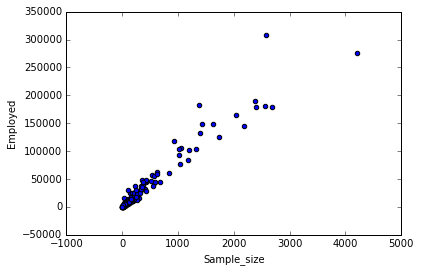

In [17]:
recent_grads.plot(x="Sample_size", y="Employed", kind="scatter")

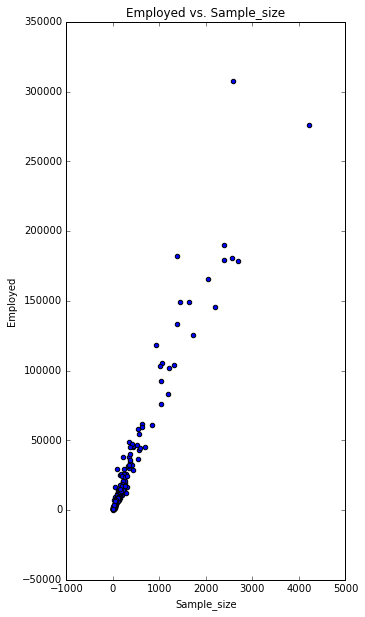

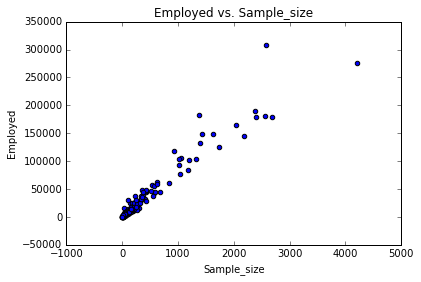

In [22]:
# Tweak the parameters for better fit, add a title, and isolate the axes for later use
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))
ax = recent_grads.plot(x = 'Sample_size', y = 'Employed', kind = 'scatter')
ax.set_title('Employed vs. Sample_size')

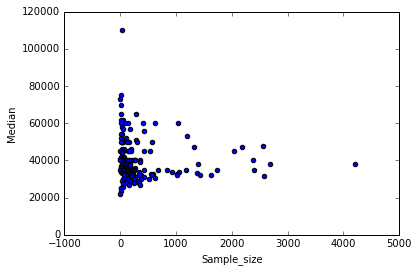

In [24]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

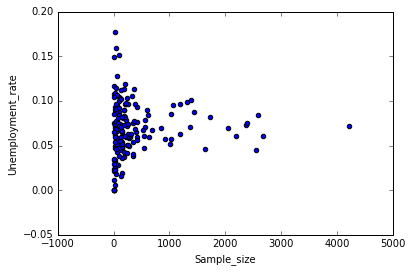

In [25]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

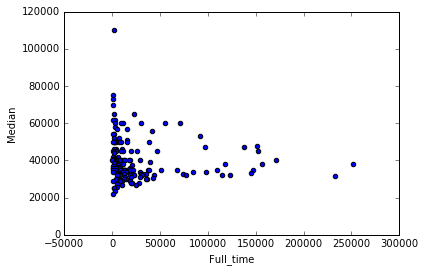

In [26]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

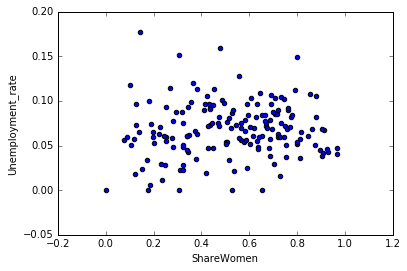

In [27]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

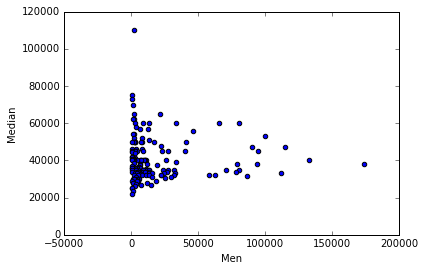

In [28]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

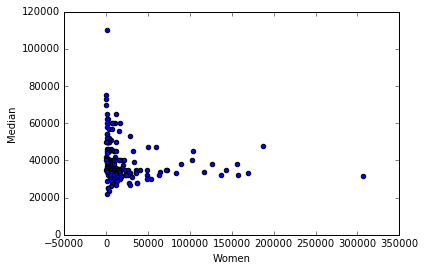

In [29]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

Here I will explore the column distributions with histograms, using the Series plotting method this time. dataframe.plot is for multiple columns, while series.plot is for individual columns.

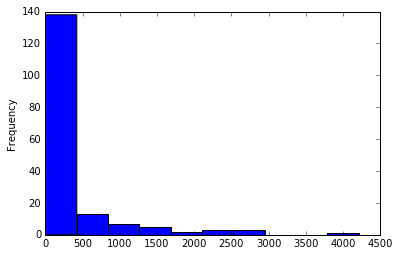

In [30]:
recent_grads['Sample_size'].plot(kind='hist')

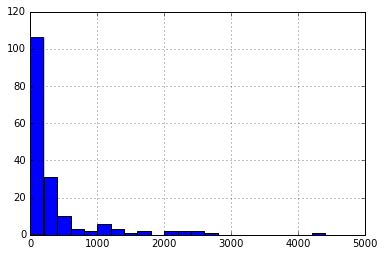

In [33]:
# Modify the binning strategy to get a different view
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

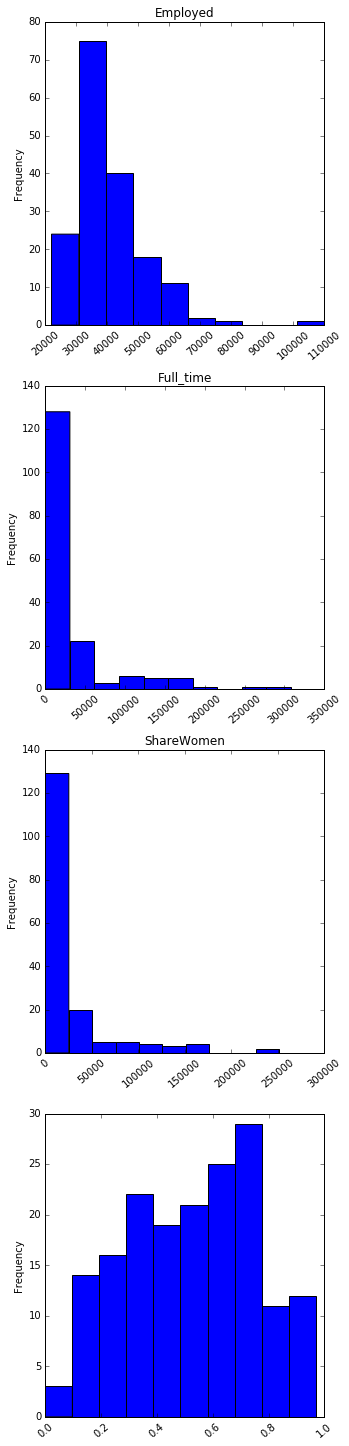

In [69]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,25))
for r in range(1,5):
    ax.set_title(cols[r])
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

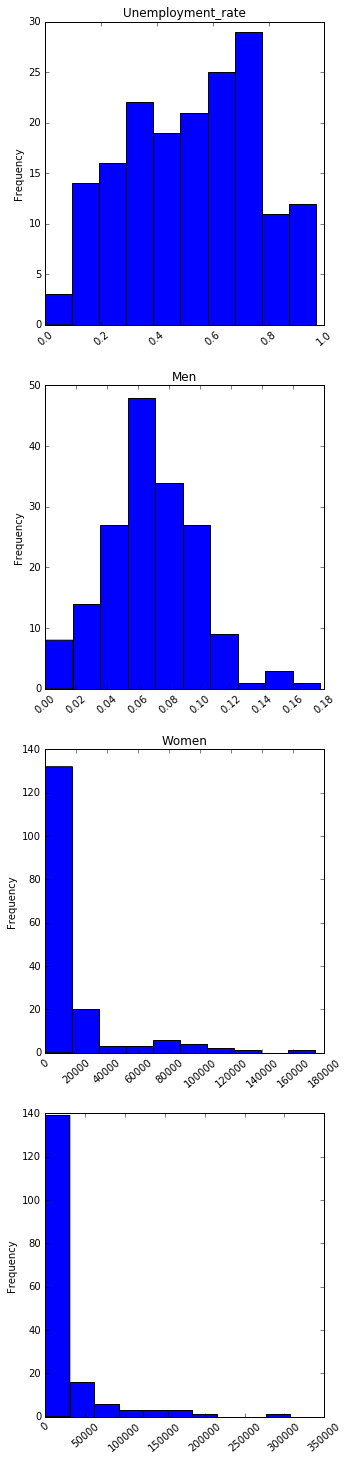

In [68]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,25))
for r in range(4,8):
    ax.set_title(cols[r])
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7757d88668>,
      dtype=object)

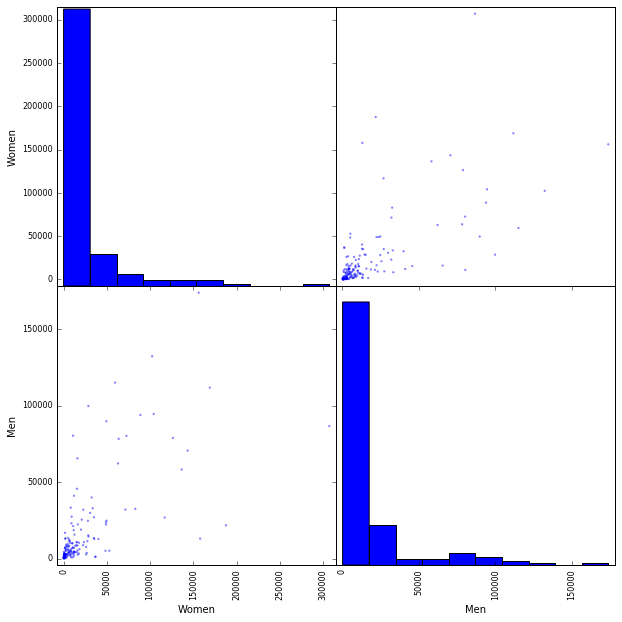

In [74]:
# The separately-imported pandas matrix module will simplify this process
scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7755cc4f28>,
      dtype=object)

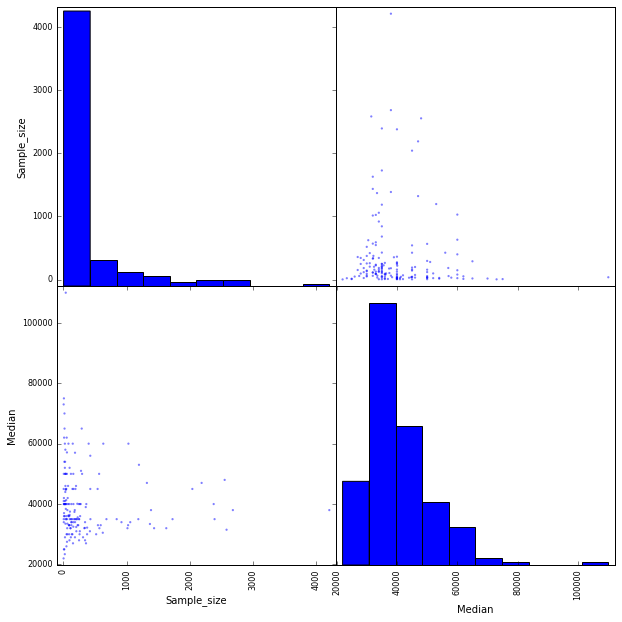

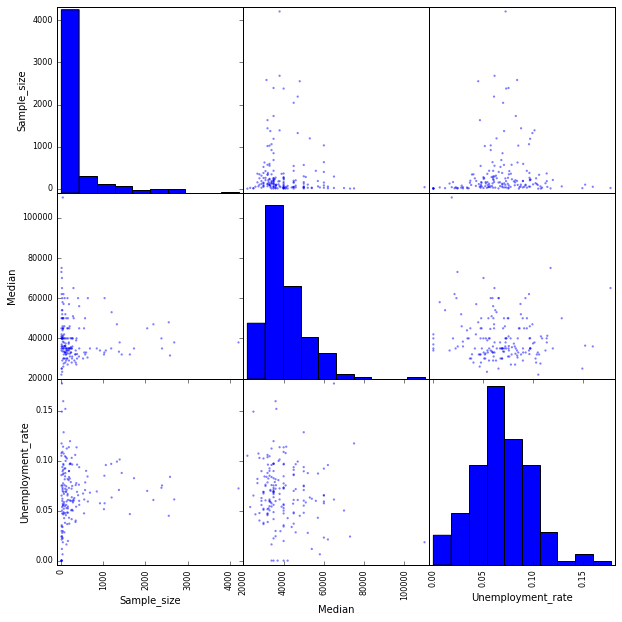

In [79]:
scatter_matrix(recent_grads[['Sample_size', 'Median']],figsize=(10,10))
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']],figsize=(10,10))


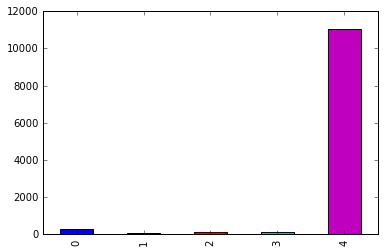

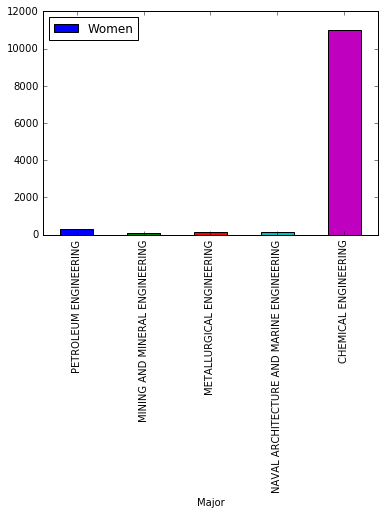

In [89]:
# Basic pandas bar plot
recent_grads[:5]['Women'].plot(kind='bar')
recent_grads[:5].plot.bar(x='Major', y='Women')

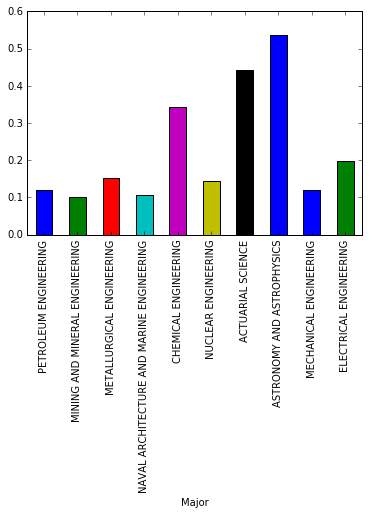

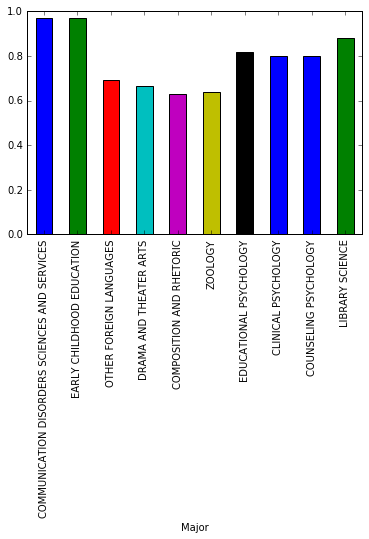

In [91]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False)